In [1]:
from datetime import datetime, time
import pandas as pd
import numpy as np


In [15]:
files_FEDXC03 = ["FED003_091022_00.CSV", "FED003_091922_00.CSV", "FED003_092622_01.CSV", "FED003_100322_00.CSV"]
files_FEDXC09 = ["FED009_091022_00.CSV", "FED009_091922_00.CSV", "FED009_092622_00.CSV", "FED009_100322_00.CSV"]


In [16]:
def make_merged_df(csvfiles):
    df_array =[]
    for f in csvfiles:
        filename = "../data/" + f
        df_array.append(pd.read_csv(filename))
    
    merged_df = pd.concat(df_array)

    return merged_df

In [18]:
df_03 = make_merged_df(files_FEDXC03)
df_09 = make_merged_df(files_FEDXC09)

In [19]:
def convert_to_datetime(timestamp):
    try:
        dt = datetime.strptime(timestamp, '%m/%d/%Y %H:%M:%S')
    except:
        dt = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S')

    return dt
    
def get_FEDevents_from_df(df, eventname="Pellet"):

    df_events = df[df["Event"] == eventname].iloc[:,0]

    df_ts = df_events.apply(lambda x: convert_to_datetime(x))
    timestamps = list(df_ts)

    t0 = timestamps[0]
    refpoint = datetime.combine(t0.date(), time(7,0))
    
    pellettimes = []
    for t in timestamps:
        Deltat = t-refpoint
        Deltatinseconds = Deltat.total_seconds()
        Deltatinhours = Deltatinseconds/3600
        pellettimes.append(Deltatinhours)

    return pellettimes

In [20]:
timestamps_03 = get_FEDevents_from_df(df_03)
timestamps_09 = get_FEDevents_from_df(df_09)

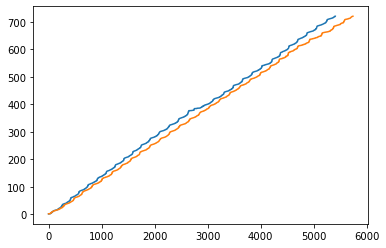

In [21]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot(timestamps_03)
ax.plot(timestamps_09)


['red']
['green']


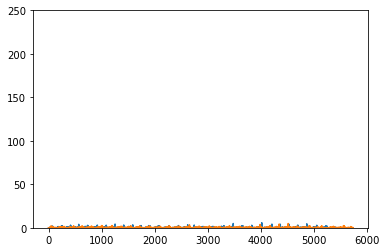

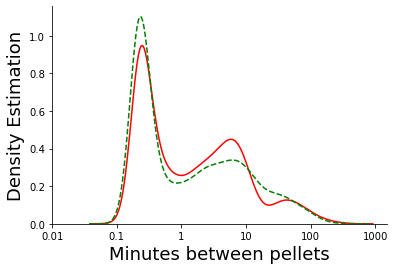

In [22]:
import seaborn as sns


def get_interpellet_intervals(pellettimes):
    IPIs = np.diff(pellettimes)
    return IPIs


interpellet_intervals_03 = get_interpellet_intervals(timestamps_03)

interpellet_intervals_09 = get_interpellet_intervals(timestamps_09)

f, ax = plt.subplots()
ax.plot(interpellet_intervals_03)
ax.plot(interpellet_intervals_09)

ax.set_ylim([0,250])


def interpellet_interval_plot(data, ax=[], colors=[], fill=False, labels=[], linestyle="-", **kwargs):
    """
    FED3 Viz: Plot a histogram of interpellet intervals for multiple devices.
    Parameters
    ----------
    FEDs : list of FED3_File objects
        FED3 files (loaded by load.FED3_File)
    kde : bool
        Whether or not to include kernel density estimation, which plots
        probability density (rather than count) and includes a fit line (see
        seaborn.distplot)
    **kwargs :
        ax : matplotlib.axes.Axes
            Axes to plot on, a new Figure and Axes are
            created if not passed
        date_filter : array
            A two-element array of datetimes (start, end) used to filter
            the data
        **kwargs also allows FED3 Viz to pass all settings to all functions.
    Returns
    -------
    fig : matplotlib.figure.Figure
    """

    if ax == []:
        f, ax = plt.subplots()

    if len(colors) != len(data):
        colors = ["grey"] * len(data)
    print(colors)

    if len(labels) != len(data):
        labels = [str(n) for n in range(len(data))]

    for idx, group in enumerate(data):

        y = (group)
        y = [np.log10(val*60) for val in y if val > 0]
            
        sns.kdeplot(y, ax=ax,
                    color=colors[idx],
                    fill=fill,
                    label=labels[idx],
                    linestyle=linestyle)

    ax.set_ylabel('Density Estimation',fontsize = 18)
    ax.set_xlabel('Minutes between pellets',fontsize = 18)

    ax.set_xticks(range(-2,4))
    ax.set_xticklabels([10**num for num in range(-2,4)])

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    
    
    
    



f, ax = plt.subplots()

interpellet_interval_plot([interpellet_intervals_03],
                           colors=[ "red"],
                           linestyle="-",
                           ax=ax)

interpellet_interval_plot([interpellet_intervals_09],
                           colors=["green"],
                           linestyle="--",
                           ax=ax)